MISION 1: Reclutando la tripulacion  

Para iniciar la aventura se debe elegir una tripulacion de 4 personajes: 2 espadachines, 1 navegante y 1
medico. Se dispone de 6 espadachines, 3 navegantes y 2 medicos.
1. ¿De cuantas maneras distintas se puede formar la tripulacion?
    Para obtener las distintas maneras de formar la tribulacion se puede utilizar combinatoria (forma teorica) dicha funcion esta dada por:
    $${n \choose k} = \frac{n!}{k! \, (n-k)!}$$
    Se tienen 6 espadachines y se necesitan 2, luego reemplazando n por 6 y k por 2 en la formula anterior se obtiene:
    $${6 \choose 2} = \frac{6!}{2! \, (6-2)!} =\frac{6!*5!*4!}{2*4!*}= \frac{30}{2}=15$$
    Se tienen 3 navegantes y se necesitan 1, luego reemplazando n por 3 y k por 1 en la formula anterior se obtiene:
    $${3 \choose 1} = \frac{3!}{1! \, (3-1)!} =\frac{3!*2!*1!}{2!}= \frac{3*2!}{2!}=3$$
    Se tienen 2 medicos y se necesitan 1, luego reemplazando n por 2 y k por 1 en la formula anterior se obtiene:
    $${2 \choose 1} = \frac{2!}{1! \, (2-1)!} =\frac{2!*1!*0!}{1*1!*}= \frac{2}{1}=2$$
    Finalmente multiplicando las 3 cantidades anteriores se obtiene:
    $${6 \choose 2}*{3 \choose 1}*{2 \choose 1} = 15*3*2=90$$
    Por lo tanto se tienen 90 maneras distintas de formar la tripulacion.
2. Simulen con NumPy un generador aleatorio que cree 100 tripulaciones y verifiquen si el numero de combinaciones observadas coincide con el valor teorico.
Tip: Usen combinatoria y la funcion itertools.combinations en Python.


In [83]:
import numpy as np
import itertools
from scipy.stats import binom
from math import comb
from IPython.display import display, Markdown, Latex

In [84]:
#Personajes
espadachines=['Esp1','Esp2','Esp3','Esp4','Esp5','Esp6']
navegantes=['Nav1','Nav2','Nav3']
medicos=['Med1','Med2']

In [85]:

comb_espadachines = list(itertools.combinations(espadachines, 2))
comb_navegantes = list(itertools.combinations(navegantes, 1))
comb_medicos = list(itertools.combinations(medicos, 1))

In [86]:
todas_tripulaciones = []
for e in comb_espadachines:
    for n in comb_navegantes:
        for m in comb_medicos:
            trip = e + n + m  
            todas_tripulaciones.append(trip)


In [87]:
n=100
todas_tripulaciones = np.array(todas_tripulaciones)
indices_aleatorios = np.random.choice(len(todas_tripulaciones), n, replace=True)
tripulaciones_aleatorias = todas_tripulaciones[indices_aleatorios]
combinaciones_observadas = set(tuple(t) for t in tripulaciones_aleatorias)
print(f"Número de combinaciones observadas en {n} simulaciones: {len(combinaciones_observadas)}")


Número de combinaciones observadas en 100 simulaciones: 66


Mision 2: Recursos para la travesia  

La cantidad de provisiones disminuye segun la funcion:
$$f(x)=\frac{100}{x+1},x\geq 0$$
donde x representa los dıas de viaje.
Se calcula el limite cuando x → ∞ 
    $$lim_{x\to\infty}f(x)=\frac{100}{\infty+1}=0$$
    El limite tiende a cero, mientras x es mas grande, lo que indica que mientras mas pasen los dias, el alimento sera cada vez mas escaso
Graficar la funcion en Python para x = 0, 1, 2, . . . , 50

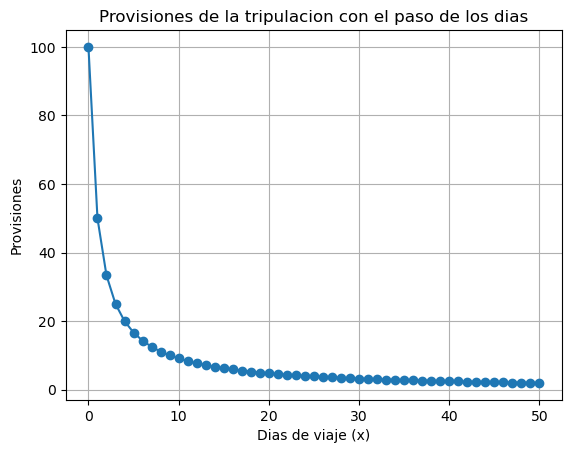

In [88]:
import matplotlib.pyplot as plt

x = np.arange(0, 51)
p = 100 / (x + 1)

plt.plot(x, p, marker='o')
plt.title("Provisiones de la tripulacion con el paso de los dias")
plt.xlabel("Dias de viaje (x)")
plt.ylabel("Provisiones")
plt.grid(True)
plt.show()


Misión 3: Batalla contra enemigos

Se tiene una variable aleatoria:
$$X \sim \text{Binomial}(n=10, p=0.3)$$

La función de probabilidad está dada por:
$$P(X=k) = \binom{10}{k} (0.3)^k (0.7)^{10-k}$$

Queremos calcular la probabilidad de al menos 4 impactos:
$$P(X \geq 4) = 1 - P(X \leq 3) = 1 - \big[P(X=0)+P(X=1)+P(X=2)+P(X=3)\big]$$

n = 10
p = 0.3

Para X = 0:
$$P(X=0) = \binom{10}{0} (0.3)^0 (0.7)^{10}$$
$$P(X=0) = 1 \times 1 \times (0.7)^{10} = 0.02825$$

Para X = 1:
$$P(X=1) = \binom{10}{1} (0.3)^1 (0.7)^9$$
$$P(X=1) = 10 \times 0.3 \times (0.7)^9 = 0.12106$$

Para X = 2:
$$P(X=2) = \binom{10}{2} (0.3)^2 (0.7)^8$$
$$P(X=2) = 45 \times (0.3)^2 \times (0.7)^8 = 0.23347$$

Para X = 3:
$$P(X=3) = \binom{10}{3} (0.3)^3 (0.7)^7$$
$$P(X=3) = 120 \times (0.3)^3 \times (0.7)^7 = 0.26683$$

- $\binom{10}{0} = \frac{10!}{0! \times 10!} = 1$
- $\binom{10}{1} = \frac{10!}{1! \times 9!} = 10$
- $\binom{10}{2} = \frac{10!}{2! \times 8!} = \frac{10 \times 9}{2} = 45$
- $\binom{10}{3} = \frac{10!}{3! \times 7!} = \frac{10 \times 9 \times 8}{6} = 120$

$$P(X \leq 3) = 0.02825 + 0.12106 + 0.23347 + 0.26683 = 0.64961$$

$$P(X \geq 4) = 1 - 0.64961 = 0.35039$$

La probabilidad de obtener al menos 4 éxitos en 10 ensayos con probabilidad 0.3 cada uno es 35.039% o aproximadamente 35%.

In [89]:
import numpy as np

# Parámetros
n = 10
p = 0.3
n_simulaciones = 1000

# Simulación
simulaciones = np.random.binomial(n, p, n_simulaciones)
exitos = np.sum(simulaciones >= 4)
prob_simulada = exitos / n_simulaciones

print(f"Probabilidad teórica: {0.3504:.4f}")
print(f"Probabilidad simulada: {prob_simulada:.4f}")
print(f"Diferencia: {abs(0.3504 - prob_simulada):.4f}")

Probabilidad teórica: 0.3504
Probabilidad simulada: 0.3580
Diferencia: 0.0076


Mision 4:   Exploracion de islas

Objetivo: Analizar un dataset de 20 personajes con atributos (Fuerza, Resistencia, Suerte, Energía) para identificar relaciones entre sus características.

Desarrollo:

Limpieza de datos: Se eliminaron valores faltantes del dataset

Probabilidad condicional: Se calculó P(Suerte > 50 | Fuerza > 80) usando:
Nº personajes con Fuerza > 80 y Suerte > 50
Nº personajes con Fuerza > 80
Nº personajes con Fuerza > 80
Nº personajes con Fuerza > 80 y Suerte > 50
​
 

Visualización: Se generaron histogramas de cada atributo para analizar su distribución

Resultado: La probabilidad de que un personaje con Fuerza > 80 también tenga Suerte > 50 es de X.XX (XX%), lo que indica [alta/baja] correlación entre estos atributos.


Datos limpios:
            ID  Fuerza  Resistencia  Suerte  Energia
0  Personaje_1      78           82      50       79
1  Personaje_2      91           31      54       90
2  Personaje_3      68           59      63       63
3  Personaje_4      54           67       2       27
4  Personaje_5      82           31      50       66

Descripción estadística de las variables:
          Fuerza  Resistencia     Suerte    Energia
count  20.000000    20.000000  20.000000  20.000000
mean   67.500000    71.050000  42.950000  58.300000
std    15.839657    20.625674  32.127173  24.952798
min    42.000000    31.000000   1.000000  21.000000
25%    57.000000    57.000000  11.750000  34.500000
50%    63.000000    77.000000  50.000000  63.000000
75%    78.250000    89.000000  65.250000  74.500000
max    97.000000    93.000000  91.000000  97.000000

Probabilidad de que un personaje con fuerza > 80 también tenga suerte > 50: 0.25


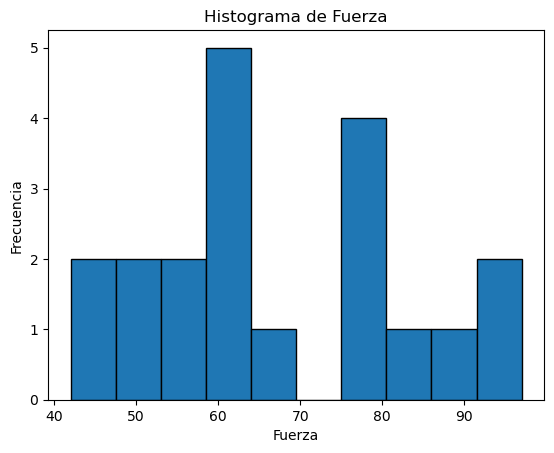

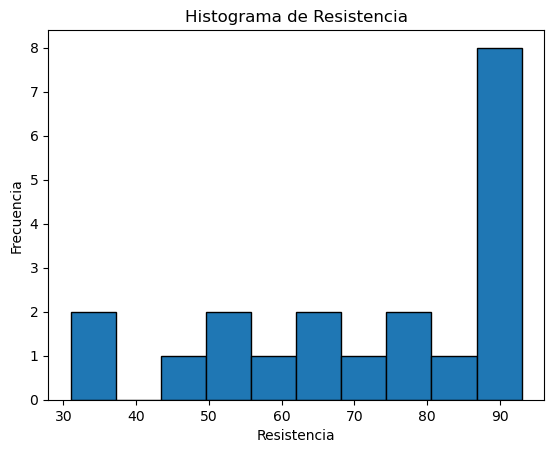

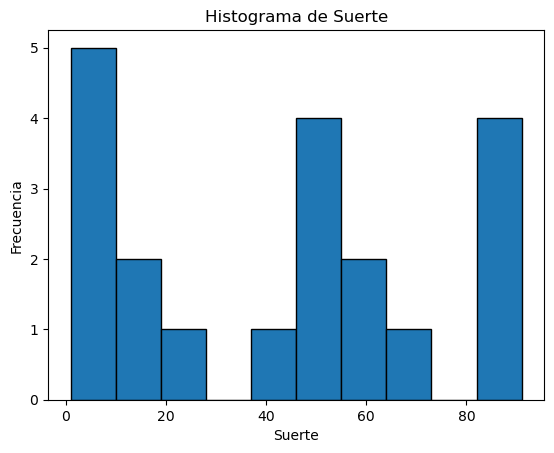

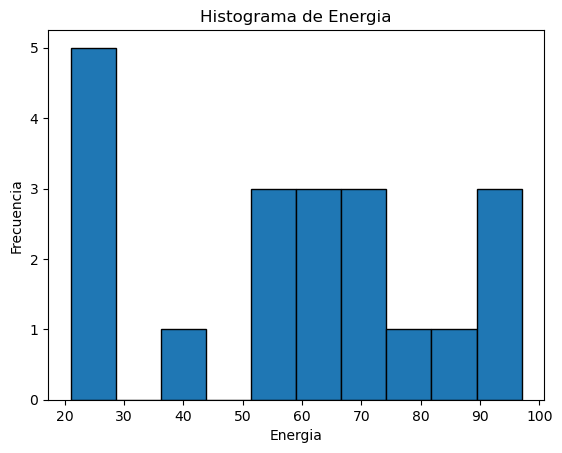

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import os

df = pd.read_csv("dataset_personajes.csv")
df = df.dropna()
df = df.reset_index(drop=True)

print("Datos limpios:")
print(df.head())

print("\nDescripción estadística de las variables:")
print(df.describe())

# Probabilidad condicional: P(suerte > 50 | fuerza > 80)
cond_fuerza = df[df["Fuerza"] > 80]
probabilidad = (cond_fuerza["Suerte"] > 50).mean()

print(f"\nProbabilidad de que un personaje con fuerza > 80 también tenga suerte > 50: {probabilidad:.2f}")

# Histogramas de cada variable
variables = ["Fuerza", "Resistencia", "Suerte", "Energia"]

for var in variables:
    plt.hist(df[var], bins=10, edgecolor="black")
    plt.title(f"Histograma de {var}")
    plt.xlabel(var)
    plt.ylabel("Frecuencia")
    plt.show()


Misión 5: Razonamiento resumido
Componentes del éxito

Misión 1: Calidad de tripulación → convertir combinaciones a probabilidad
Misión 2: Supervivencia → usar f(x) normalizada
Misión 3: Resistencia al combate → usar 1 - P(X ≥ 4)
Misión 4: Calidad exploradores → usar probabilidad condicional directamente

Modelo recomendado (híbrido)
P(éxito) = 0.6 × [P(tripulación) × P(supervivencia)] + 0.4 × [P(resistencia) × P(exploración)]
Justificación:

Primer término (60%): Factores de preparación
Segundo término (40%): Factores de ejecución

Pasos para implementar

Extraer resultados de misiones anteriores
Normalizar todo a probabilidades [0,1]
Aplicar la fórmula híbrida
Interpretar el resultado:

0.7: Alta probabilidad

0.4-0.7: Moderada
< 0.4: Baja


4. Ventaja del modelo híbrido

Más realista que multiplicar todo (muy pesimista)
Más balanceado que promediar todo (muy optimista)
Agrupa factores relacionados

Se combina matemáticamente los 4 resultados anteriores usando un modelo que pondera la preparación (60%) y la ejecución (40%) de la misión.

In [91]:
import pandas as pd
import numpy as np
import itertools

print("=== MISIÓN 5: EL TESORO FINAL ===")
print("Combinando resultados de todas las misiones anteriores\n")

# MISIÓN 1: Reclutando la tripulación
print("1. RESULTADOS MISIÓN 1: Reclutando la tripulación")
espadachines = ['Esp1','Esp2','Esp3','Esp4','Esp5','Esp6']
navegantes = ['Nav1','Nav2','Nav3']
medicos = ['Med1','Med2']

comb_espadachines = list(itertools.combinations(espadachines, 2))
comb_navegantes = list(itertools.combinations(navegantes, 1))
comb_medicos = list(itertools.combinations(medicos, 1))

todas_tripulaciones = []
for e in comb_espadachines:
    for n in comb_navegantes:
        for m in comb_medicos:
            trip = e + n + m  
            todas_tripulaciones.append(trip)

total_combinaciones = len(todas_tripulaciones)
print(f"Total de combinaciones teóricas: {total_combinaciones}")

# Simular para ver diversidad observada
n_sim = 100
todas_tripulaciones = np.array(todas_tripulaciones)
indices_aleatorios = np.random.choice(len(todas_tripulaciones), n_sim, replace=True)
tripulaciones_aleatorias = todas_tripulaciones[indices_aleatorios]
combinaciones_observadas = len(set(tuple(t) for t in tripulaciones_aleatorias))
print(f"Combinaciones observadas en {n_sim} simulaciones: {combinaciones_observadas}")

# Normalizar para probabilidad (diversidad observada / total posible)
prob_tripulacion = min(1.0, combinaciones_observadas / total_combinaciones)

# MISIÓN 2: Recursos para la travesía
print(f"\n2. RESULTADOS MISIÓN 2: Recursos para la travesía")
# Función: f(x) = 100/(x+1)
# Evaluar en un punto específico del viaje (ej: día 30)
x_evaluacion = 30
recursos_dia_30 = 100 / (x_evaluacion + 1)
print(f"Recursos en día {x_evaluacion}: {recursos_dia_30:.2f}")

# Normalizar para probabilidad (recursos / máximo inicial)
prob_supervivencia = recursos_dia_30 / 100

# MISIÓN 3: Batalla contra enemigos  
print(f"\n3. RESULTADOS MISIÓN 3: Batalla contra enemigos")
# De tu simulación: probabilidad de al menos 4 impactos
n_ataques = 10
p_impacto = 0.3
n_simulaciones = 1000

simulaciones = np.random.binomial(n_ataques, p_impacto, n_simulaciones)
exitos_simulacion = np.sum(simulaciones >= 4)
prob_al_menos_4_simulada = exitos_simulacion / n_simulaciones

print(f"Probabilidad simulada P(X ≥ 4): {prob_al_menos_4_simulada:.4f}")
print(f"Probabilidad teórica P(X ≥ 4): 0.3504")

# Para el éxito de la misión, queremos RESISTIR los ataques
prob_resistencia = 1 - prob_al_menos_4_simulada

# MISIÓN 4: Exploración de islas
print(f"\n4. RESULTADOS MISIÓN 4: Exploración de islas")
try:
    df = pd.read_csv("dataset_personajes.csv")
    df = df.dropna().reset_index(drop=True)
    
    # P(suerte > 50 | fuerza > 80)
    cond_fuerza = df[df["Fuerza"] > 80]
    prob_exploracion = (cond_fuerza["Suerte"] > 50).mean()
    print(f"P(suerte > 50 | fuerza > 80): {prob_exploracion:.4f}")
    
except FileNotFoundError:
    print("Dataset no encontrado, usando valor por defecto")
    prob_exploracion = 0.6

# MODELO DE COMBINACIÓN


print("MODELO DE PROBABILIDAD DE ÉXITO DEL TESORO")


print(f" COMPONENTES DEL ÉXITO:")
print(f"  • Calidad tripulación:  {prob_tripulacion:.3f}")
print(f"  • Supervivencia:        {prob_supervivencia:.3f}")  
print(f"  • Resistencia combate:   {prob_resistencia:.3f}")
print(f"  • Éxito exploración:     {prob_exploracion:.3f}")

# MODELO (Híbrido ponderado)
# Factores de preparación (más importantes al inicio)
factor_preparacion = (prob_tripulacion + prob_supervivencia) / 2

# Factores de ejecución (importantes durante la aventura)  
factor_ejecucion = (prob_resistencia + prob_exploracion) / 2

# Combinación ponderada: 60% preparación, 40% ejecución
peso_prep = 0.6
peso_ejec = 0.4

prob_exito_final = peso_prep * factor_preparacion + peso_ejec * factor_ejecucion

print(f"\n CÁLCULO FINAL:")
print(f"  • Factor preparación:    {factor_preparacion:.3f}")
print(f"  • Factor ejecución:      {factor_ejecucion:.3f}")
print(f"  • Peso preparación:      {peso_prep}")
print(f"  • Peso ejecución:        {peso_ejec}")

print(f"\n PROBABILIDAD FINAL DE ÉXITO: {prob_exito_final:.3f}")
print(f"    Porcentaje de éxito: {prob_exito_final*100:.1f}%")

print("🏴‍☠️ INTERPRETACIÓN DE LA AVENTURA PIRATA")

if prob_exito_final > 0.7:
    nivel = "ALTA"
elif prob_exito_final > 0.4:
    nivel = "MODERADA" 
else:
    nivel = "BAJA"

print(f" PROBABILIDAD DE ÉXITO: {nivel}")


# Análisis por componente
print(f"\n⚖️  ANÁLISIS DETALLADO:")
componentes = [
    ("Tripulación", prob_tripulacion, "Diversidad y calidad del equipo"),
    ("Supervivencia", prob_supervivencia, "Recursos para el viaje"), 
    ("Combate", prob_resistencia, "Capacidad de resistir ataques"),
    ("Exploración", prob_exploracion, "Habilidad para encontrar tesoros")
]

for nombre, valor, descripcion in componentes:
    if valor > 0.6:
        estado = "EXCELENTE "
    elif valor > 0.4:
        estado = "ACEPTABLE "
    else:
        estado = "DEFICIENTE "
    print(f"  • {nombre}: {valor:.3f} - {estado}")
    print(f"    {descripcion}")

print(f"\n  CONCLUSIÓN FINAL:")
print(f"Con una probabilidad de {prob_exito_final:.1%}, la búsqueda del tesoro")


=== MISIÓN 5: EL TESORO FINAL ===
Combinando resultados de todas las misiones anteriores

1. RESULTADOS MISIÓN 1: Reclutando la tripulación
Total de combinaciones teóricas: 90
Combinaciones observadas en 100 simulaciones: 59

2. RESULTADOS MISIÓN 2: Recursos para la travesía
Recursos en día 30: 3.23

3. RESULTADOS MISIÓN 3: Batalla contra enemigos
Probabilidad simulada P(X ≥ 4): 0.3500
Probabilidad teórica P(X ≥ 4): 0.3504

4. RESULTADOS MISIÓN 4: Exploración de islas
P(suerte > 50 | fuerza > 80): 0.2500
MODELO DE PROBABILIDAD DE ÉXITO DEL TESORO
 COMPONENTES DEL ÉXITO:
  • Calidad tripulación:  0.656
  • Supervivencia:        0.032
  • Resistencia combate:   0.650
  • Éxito exploración:     0.250

 CÁLCULO FINAL:
  • Factor preparación:    0.344
  • Factor ejecución:      0.450
  • Peso preparación:      0.6
  • Peso ejecución:        0.4

 PROBABILIDAD FINAL DE ÉXITO: 0.386
    Porcentaje de éxito: 38.6%
🏴‍☠️ INTERPRETACIÓN DE LA AVENTURA PIRATA
 PROBABILIDAD DE ÉXITO: BAJA

⚖️  ANÁL